In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
zomato=pd.read_csv(r"C:\Users\sivacatering\Documents\Afitech attachments\projects-eda\EDA\zomato\zomato\zomato.csv")
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
zomato.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [4]:
zomato=zomato.drop(columns=(["url","phone","reviews_list"]))
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[],Buffet,Banashankari


In [5]:
zomato.drop_duplicates(inplace=True)

In [6]:
zomato.isna().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                            7767
votes                              0
location                          21
rest_type                        227
dish_liked                     28047
cuisines                          45
approx_cost(for two people)      344
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [7]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51651 entries, 0 to 51716
Data columns (total 14 columns):
address                        51651 non-null object
name                           51651 non-null object
online_order                   51651 non-null object
book_table                     51651 non-null object
rate                           43884 non-null object
votes                          51651 non-null int64
location                       51630 non-null object
rest_type                      51424 non-null object
dish_liked                     23604 non-null object
cuisines                       51606 non-null object
approx_cost(for two people)    51307 non-null object
menu_item                      51651 non-null object
listed_in(type)                51651 non-null object
listed_in(city)                51651 non-null object
dtypes: int64(1), object(13)
memory usage: 3.3+ MB


In [8]:
zomato.dropna(how="any",inplace=True)
zomato.isna().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [9]:
zomato.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'menu_item', 'listed_in(type)',
       'listed_in(city)'],
      dtype='object')

In [10]:
zomato=zomato.rename(columns={"approx_cost(for two people)":"cost","listed_in(type)":"type","listed_in(city)":"city"})

In [11]:
zomato.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[],Buffet,Banashankari


In [12]:
#Removing '/5' from Rates
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')
zomato['rate'].head() # looking at the dataset after transformation

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [13]:
zomato["rate"].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [14]:
# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(1, 0),inplace=True)
zomato.book_table.replace(('Yes','No'),(1, 0),inplace=True)
zomato.head() # looking at the dataset after transformation

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,[],Buffet,Banashankari


In [15]:
#Encode the input Variables
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes', 'online_order', 'book_table'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())
zomato_en.head() # looking at the dataset after transformation

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,menu_item,type,city
0,0,0,1,1,4.1,775,0,0,0,0,800,0,0,0
1,1,1,1,0,4.1,787,0,0,1,1,800,0,0,0
2,2,2,1,0,3.8,918,0,1,2,2,800,0,0,0
3,3,3,0,0,3.7,88,0,2,3,3,300,0,0,0
4,4,4,0,0,3.8,166,1,0,4,4,600,0,0,0


In [16]:
zomato_en["cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,350', '2,200', '1,400', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

<AxesSubplot:>

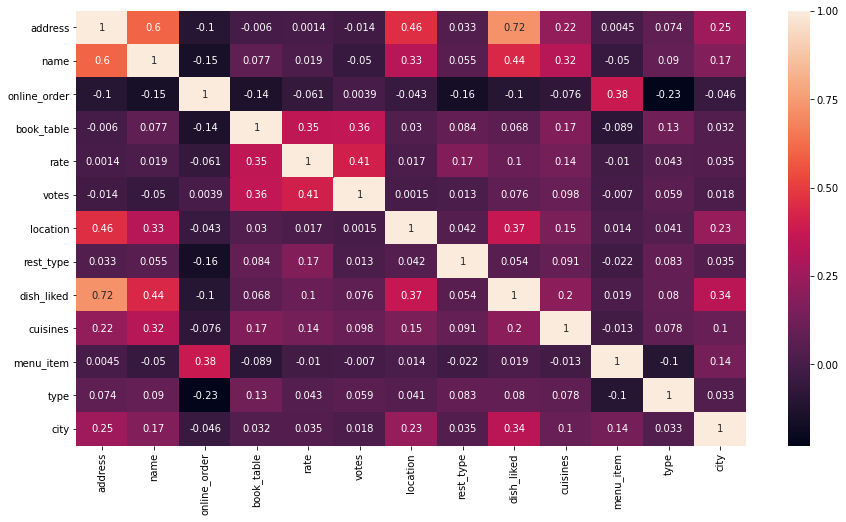

In [17]:
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

### There is no much correlation between any features

# Data Visualization

Text(0.5, 1.0, 'Which type of delivery people prefer more')

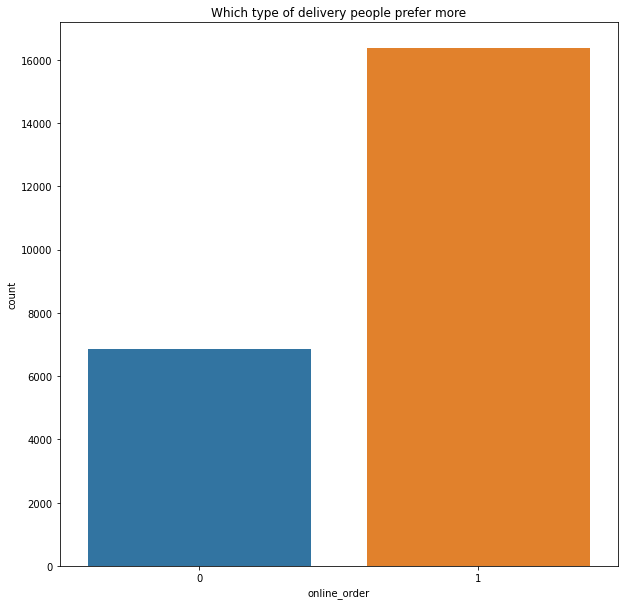

In [18]:
sns.countplot(zomato['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Which type of delivery people prefer more')

### It can be seen that people in banglore prefers online orders more

Text(0.5, 1.0, 'Restaurants table book counts')

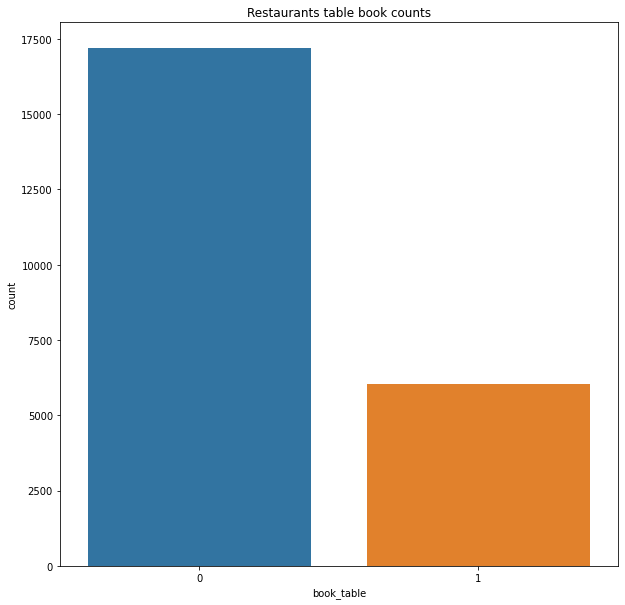

In [21]:
sns.countplot(zomato['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants table book counts')

### We can see that as the online orders are the table book counts is very less

## Note:
###     So if some business people are looking to start a new restaurant they must surely tie up with some online delivery partners to make more sales.

Text(0.5, 1.0, 'Restaurants rating visualization')

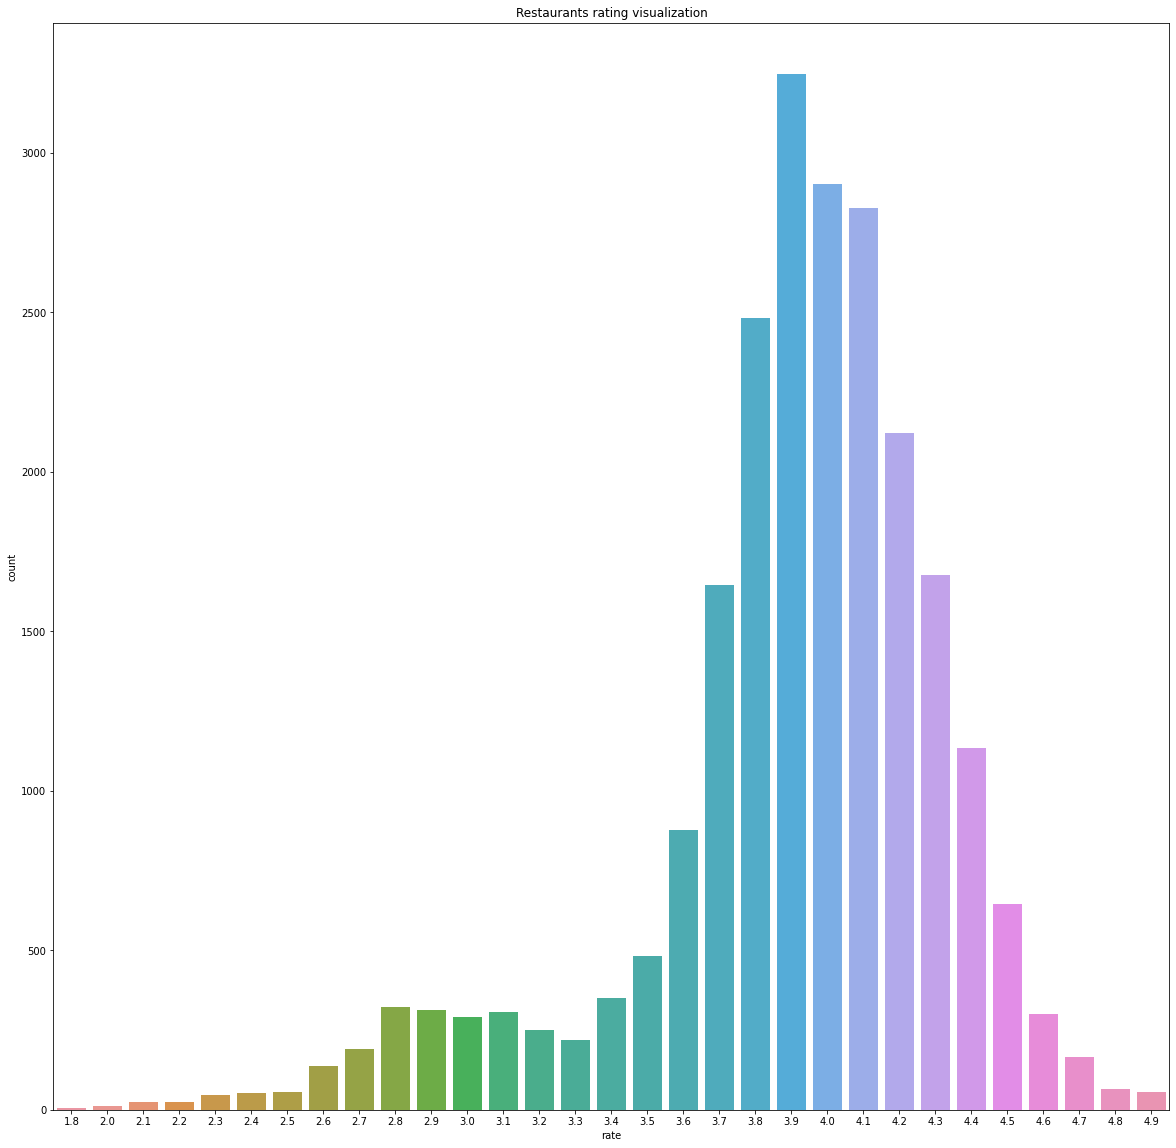

In [22]:
sns.countplot(zomato['rate'])
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.title('Restaurants rating visualization')

### From the above graph we can say that the good quality and rated restaurants are more.
### So the competition is absolutely very high

Text(0.5, 1.0, 'Which type of customer giving rating')

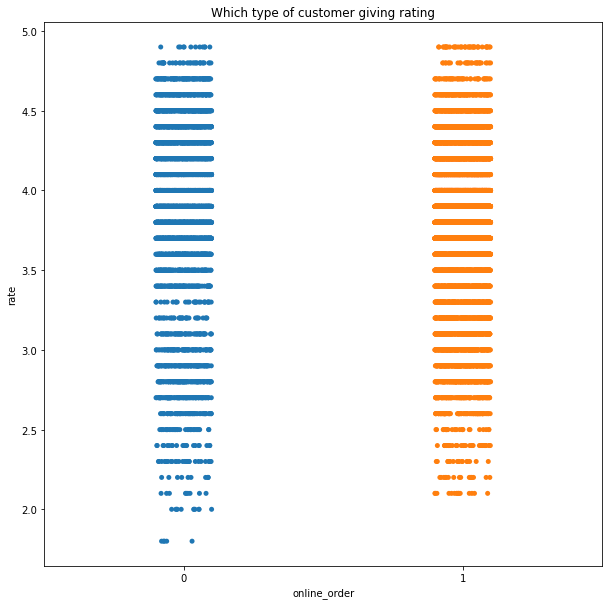

In [28]:
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.stripplot(x=zomato["online_order"],y=zomato["rate"])
plt.title("Which type of customer giving rating")

### Almost they are equally rated

Text(0.5, 1.0, 'book_tabel Vs rate')

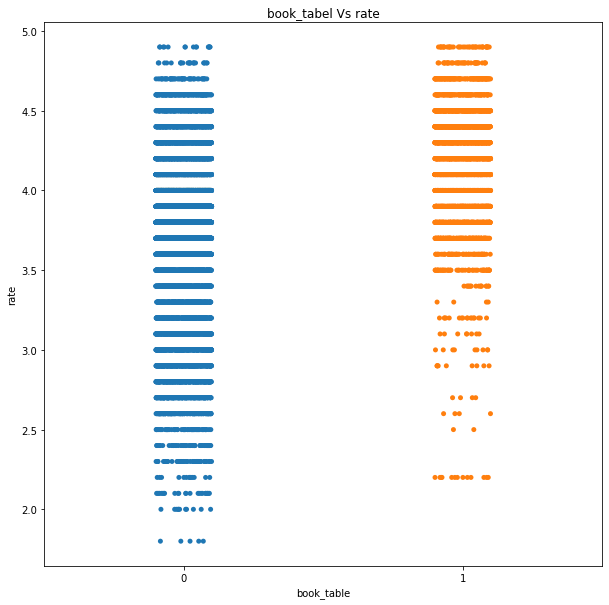

In [29]:
fig=plt.gcf()
fig.set_size_inches(10,10)
sns.stripplot(x=zomato["book_table"],y=zomato["rate"])
plt.title("book_tabel Vs rate")

### here we can see that the restaurants which have table booking is mostly rated above 3

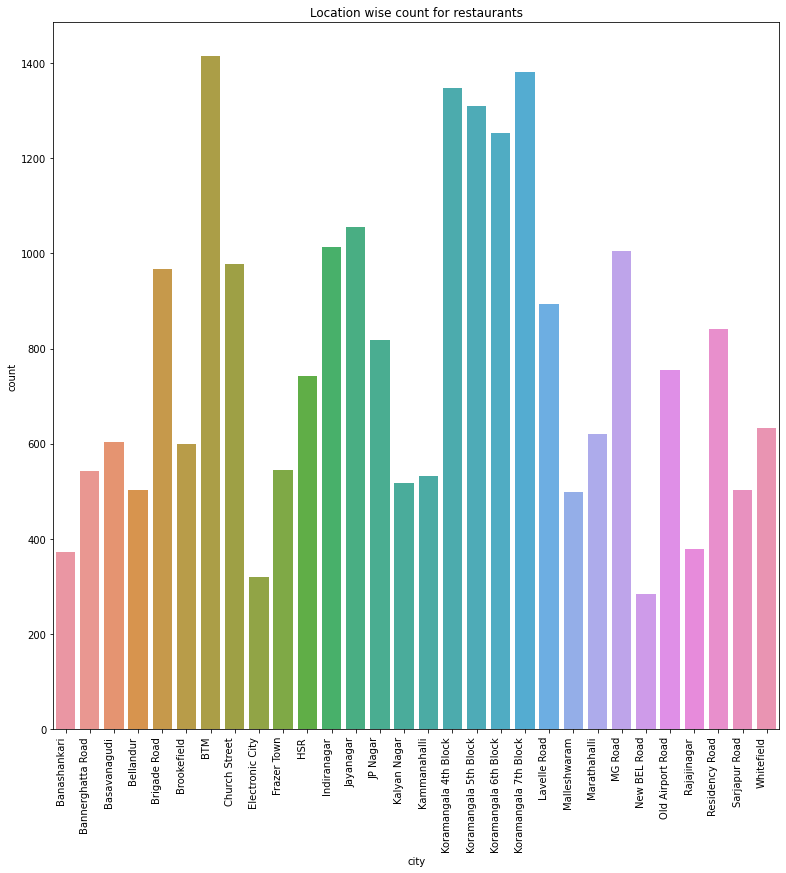

In [35]:
sns.countplot(zomato['city']).set_xticklabels(sns.countplot(zomato['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location wise count for restaurants')
plt.show()

### We can see there is less no of restaurants in electronic city and new BEL road

In [49]:
z=zomato[zomato["city"]=="Electronic City"]

In [50]:
b=zomato[zomato["city"]=="New BEL Road"]

In [54]:
c=[z,b]

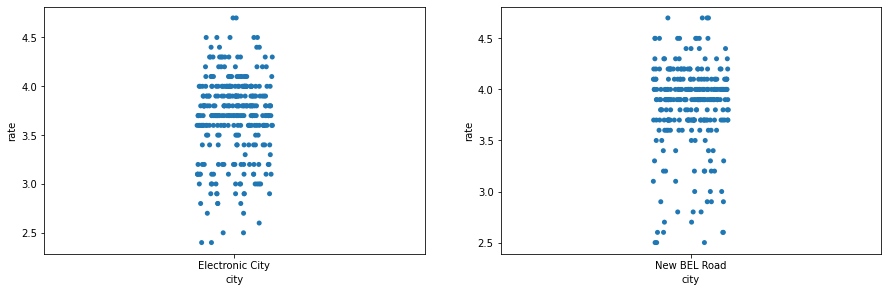

In [61]:
plt.figure(figsize=(15,10), facecolor='w')
plotnumber = 1

for column in c:
    if plotnumber<=4 :
        ax = plt.subplot(2,2,plotnumber)
        sns.stripplot(x=column["city"],y=zomato["rate"])
        #plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
sns.countplot(zomato['rest_type'])
sns.countplot(zomato['rest_type']).set_xticklabels(sns.countplot(zomato['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Restuarant Type')

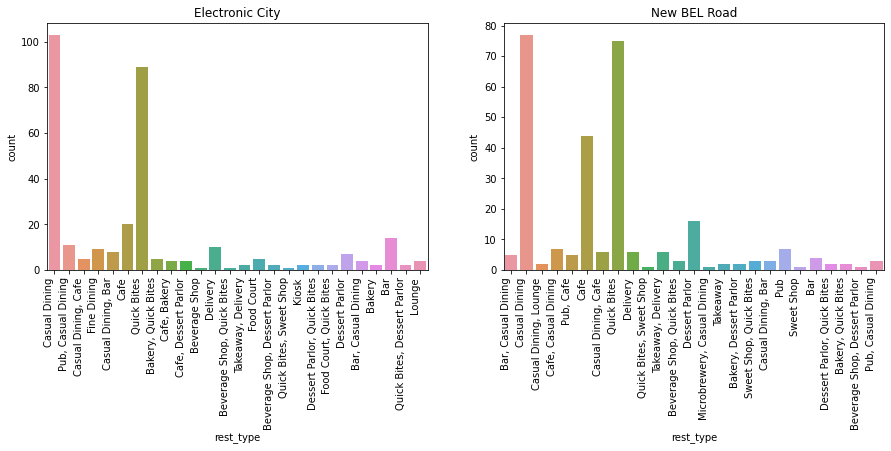

In [81]:
plt.figure(figsize=(15,10), facecolor='w')
plotnumber = 1

for column in c:
    if plotnumber<=4 :
        ax = plt.subplot(2,2,plotnumber)
        sns.countplot(column['rest_type']).set_xticklabels(sns.countplot(column['rest_type']).get_xticklabels(), rotation=90, ha="right")
        plt.title(column["city"].unique()[0])
    plotnumber+=1
plt.show()

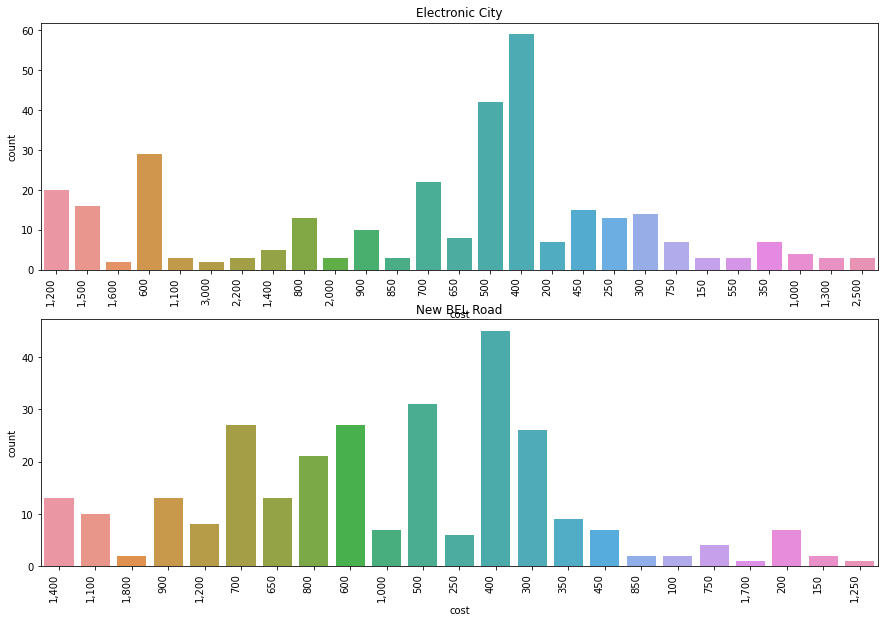

In [101]:
plt.figure(figsize=(15,10), facecolor='w')
plotnumber = 1

for column in c:
    if plotnumber<=2 :
        ax = plt.subplot(2,1,plotnumber)
        sns.countplot(column['cost']).set_xticklabels(sns.countplot(column['cost']).get_xticklabels(), rotation=90, ha="right")
        plt.title(column["city"].unique()[0])
    plotnumber+=1
plt.show()

### In these two areas the restaurants are less in number and the more available types is of casual dining and quick bites 
### So if we start other types of restaurants in these areas there will not be a huge competition
### And average cost for 2 people in these areas are between 400-700 rupees
### So if we start a restaurant and sell the foods at cheaper rates , the restaurants can sustain well in these areas

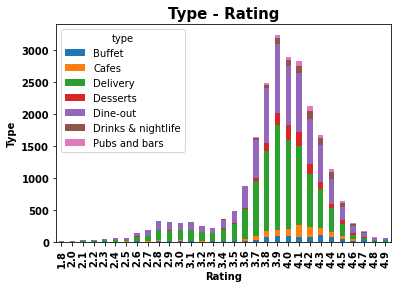

In [93]:
type_plt=pd.crosstab(zomato['rate'],zomato['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

Text(0.5, 1.0, 'Cost of Restuarant')

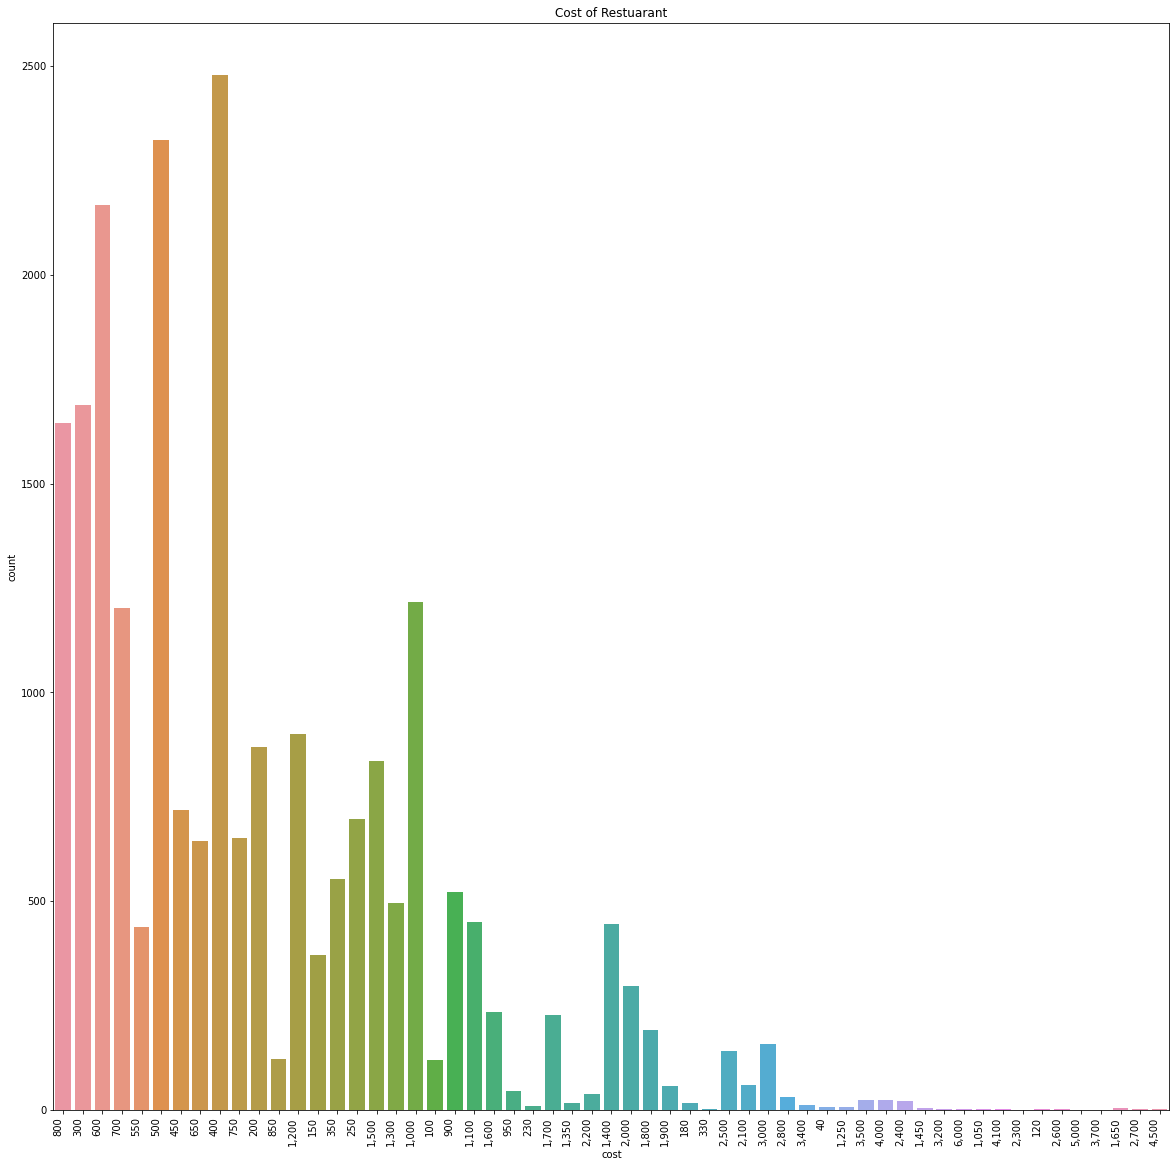

In [94]:
sns.countplot(zomato['cost'])
sns.countplot(zomato['cost']).set_xticklabels(sns.countplot(zomato['cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.title('Cost of Restuarant')

### More people in bangalore opt for restaurants only if the average cost for 2 people is within 1,000 rupees

Text(0.5, 0, 'Number of outlets')

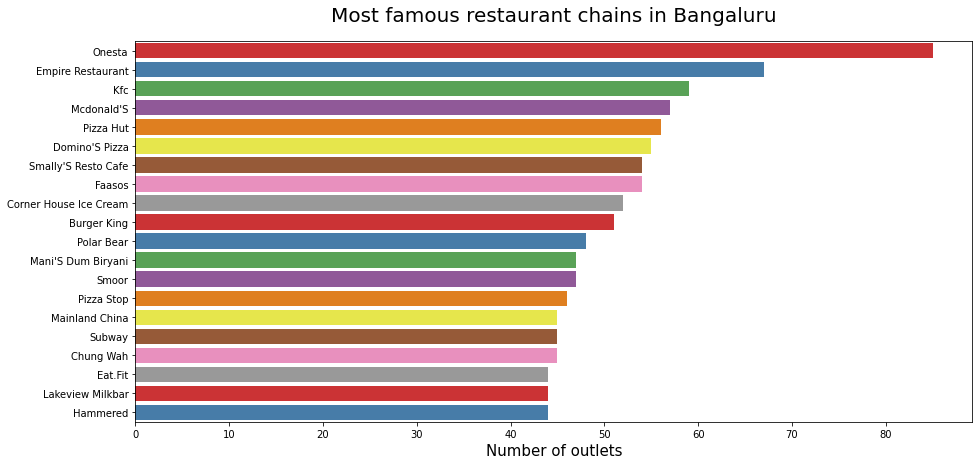

In [102]:
plt.figure(figsize=(15,7))
chains=zomato['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

### Onesta is more famous in Bangalore

In [109]:
#Some Transformations
zomato_en['cost'] = zomato_en['cost'].astype(str) #Changing the cost to string
zomato_en['cost'] = zomato_en['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
zomato_en['cost'] = zomato_en['cost'].astype(float) # Changing the cost to Float
zomato_en.info() # looking at the dataset information after transformation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23227 entries, 0 to 23226
Data columns (total 14 columns):
address         23227 non-null int32
name            23227 non-null int32
online_order    23227 non-null int64
book_table      23227 non-null int64
rate            23227 non-null float64
votes           23227 non-null int64
location        23227 non-null int32
rest_type       23227 non-null int32
dish_liked      23227 non-null int32
cuisines        23227 non-null int32
cost            23227 non-null float64
menu_item       23227 non-null int32
type            23227 non-null int32
city            23227 non-null int32
dtypes: float64(2), int32(9), int64(3)
memory usage: 1.7 MB


# Lets split the data for test and train

In [111]:
x=zomato_en.drop(columns=(["rate"]))
y=zomato_en["rate"]

In [112]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=420)

In [115]:
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [117]:
ada=AdaBoostRegressor(n_estimators=90)
lin=LinearRegression()
ran=RandomForestRegressor(n_estimators=100)
dtc=DecisionTreeRegressor(random_state=420)
etr=ExtraTreesRegressor(n_estimators=100)
gb=GradientBoostingRegressor(n_estimators=100)


In [122]:
models = {"Linear Regression" : lin,
          "Random forest" : ran,
          "AdaBoost" : ada,"Gradient Boost":gb,"Decision Tree":dtc,"Extra Tree":etr}
scores= { }
Train_set_scores={}

In [123]:
for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)
    Train_set_scores[key]=model.score(x_train,y_train)

In [141]:
datal = {"train":Train_set_scores,"test":scores} 
  
# Creates pandas DataFrame. 
dfl = pd.DataFrame(datal, index =scores.keys())
dfl.sort_values(by=["train","test"], axis=0 ,ascending=False, inplace=True) 
# print the data 
dfl

,train,test
Extra Tree,1.000000,0.919623
Decision Tree,1.000000,0.846282
Random forest,0.985590,0.904457
Gradient Boost,0.462456,0.453822
Linear Regression,0.239432,0.241108
AdaBoost,0.141128,0.122138


# Here it can observed that we got best accuracy for Extra Tree Regressor